In [1]:
# pip install pydotplus
# pip install missingno
# pip install xgboost

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
for dirname, _, filenames in os.walk(r"C:\Users\kottu\Downloads\weather.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
rainaus= pd.read_csv(r"C:\Users\kottu\Downloads\weather.csv")
rainaus.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,06-12-2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,07-12-2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,08-12-2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,09-12-2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,10-12-2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
print(f'The number of rows are {rainaus.shape[0] } and the number of columns are {rainaus.shape[1]}')

The number of rows are 142193 and the number of columns are 23


In [6]:
rainaus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
categorical_col, contin_val=[],[]

for i in rainaus.columns:
    
    if rainaus[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
rainaus.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
rainaus.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

<Axes: >

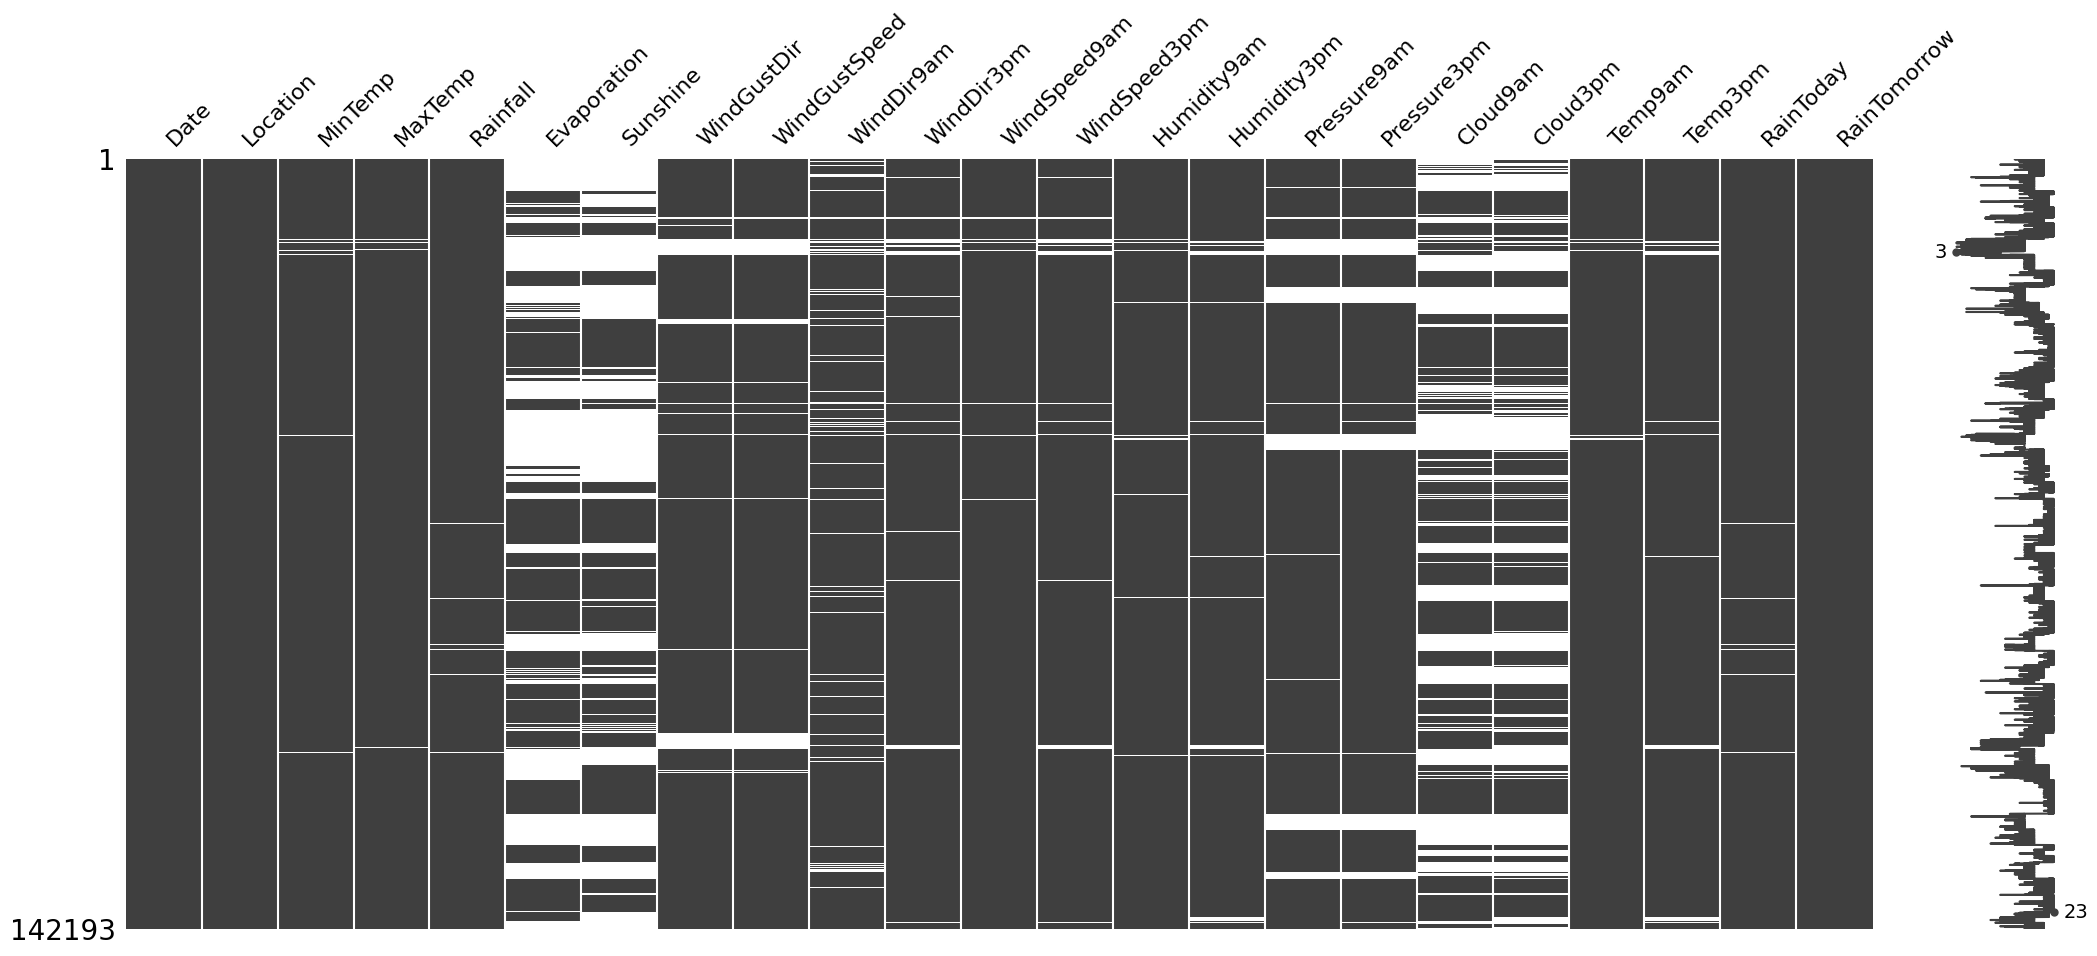

In [10]:
msno.matrix(rainaus)

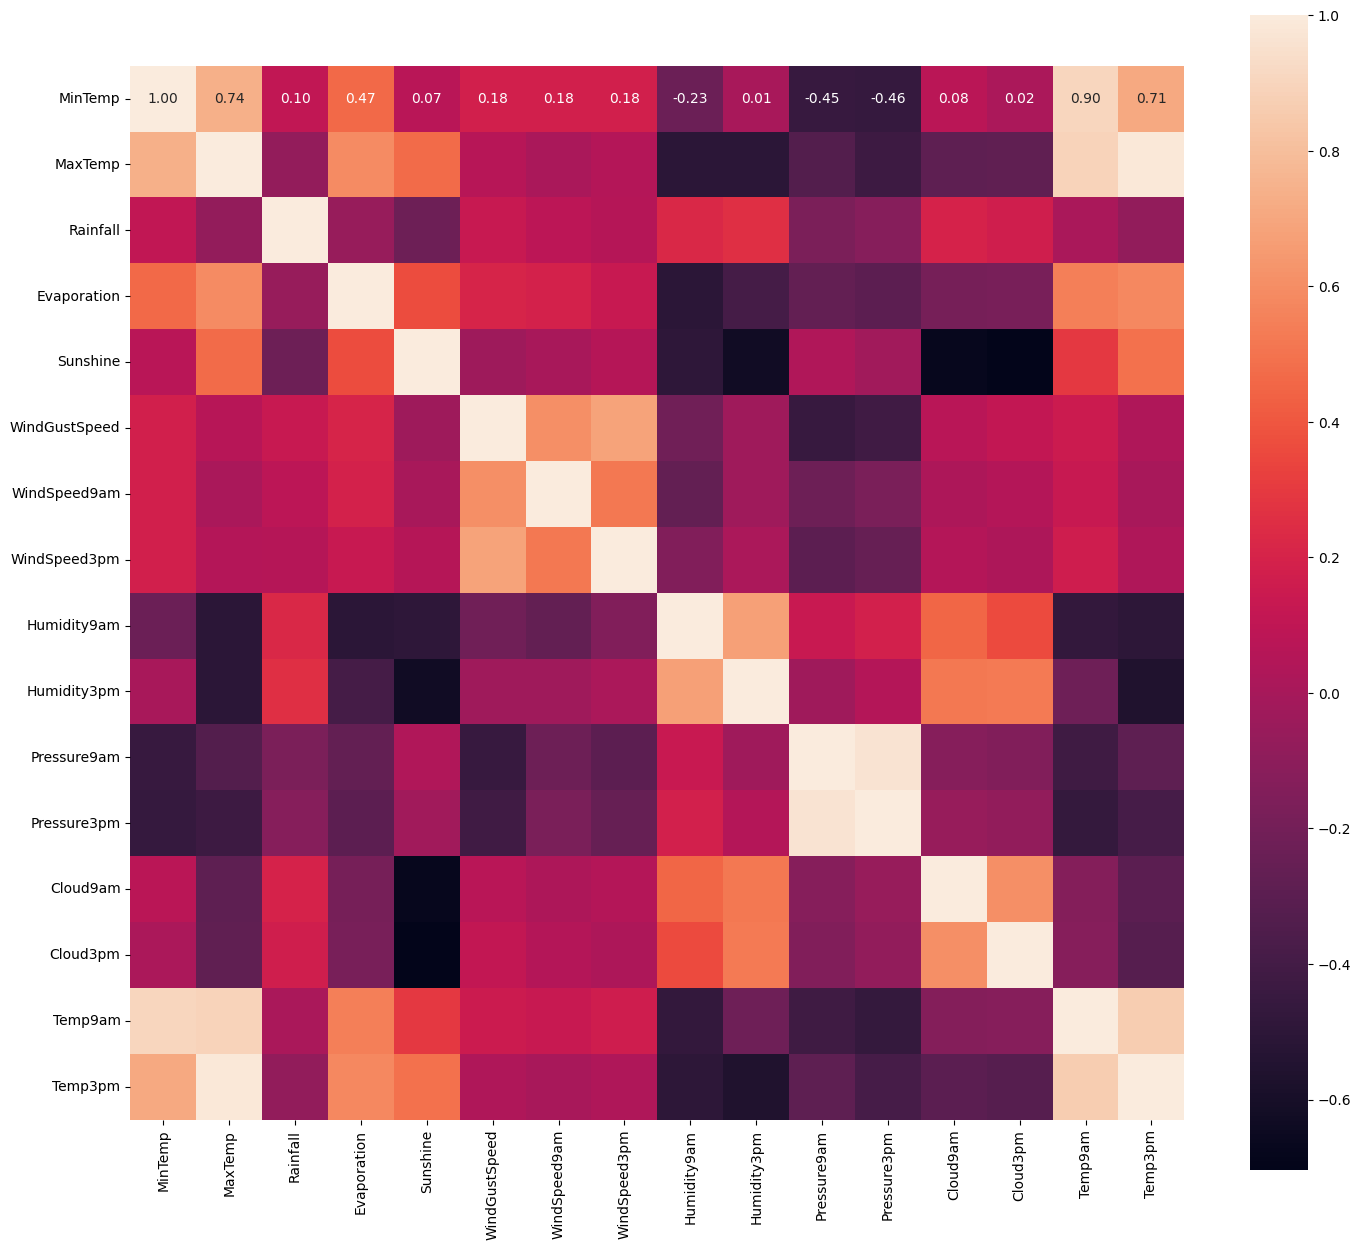

In [11]:
# Select only numeric columns
numeric_df = rainaus.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(17, 15))
ax = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


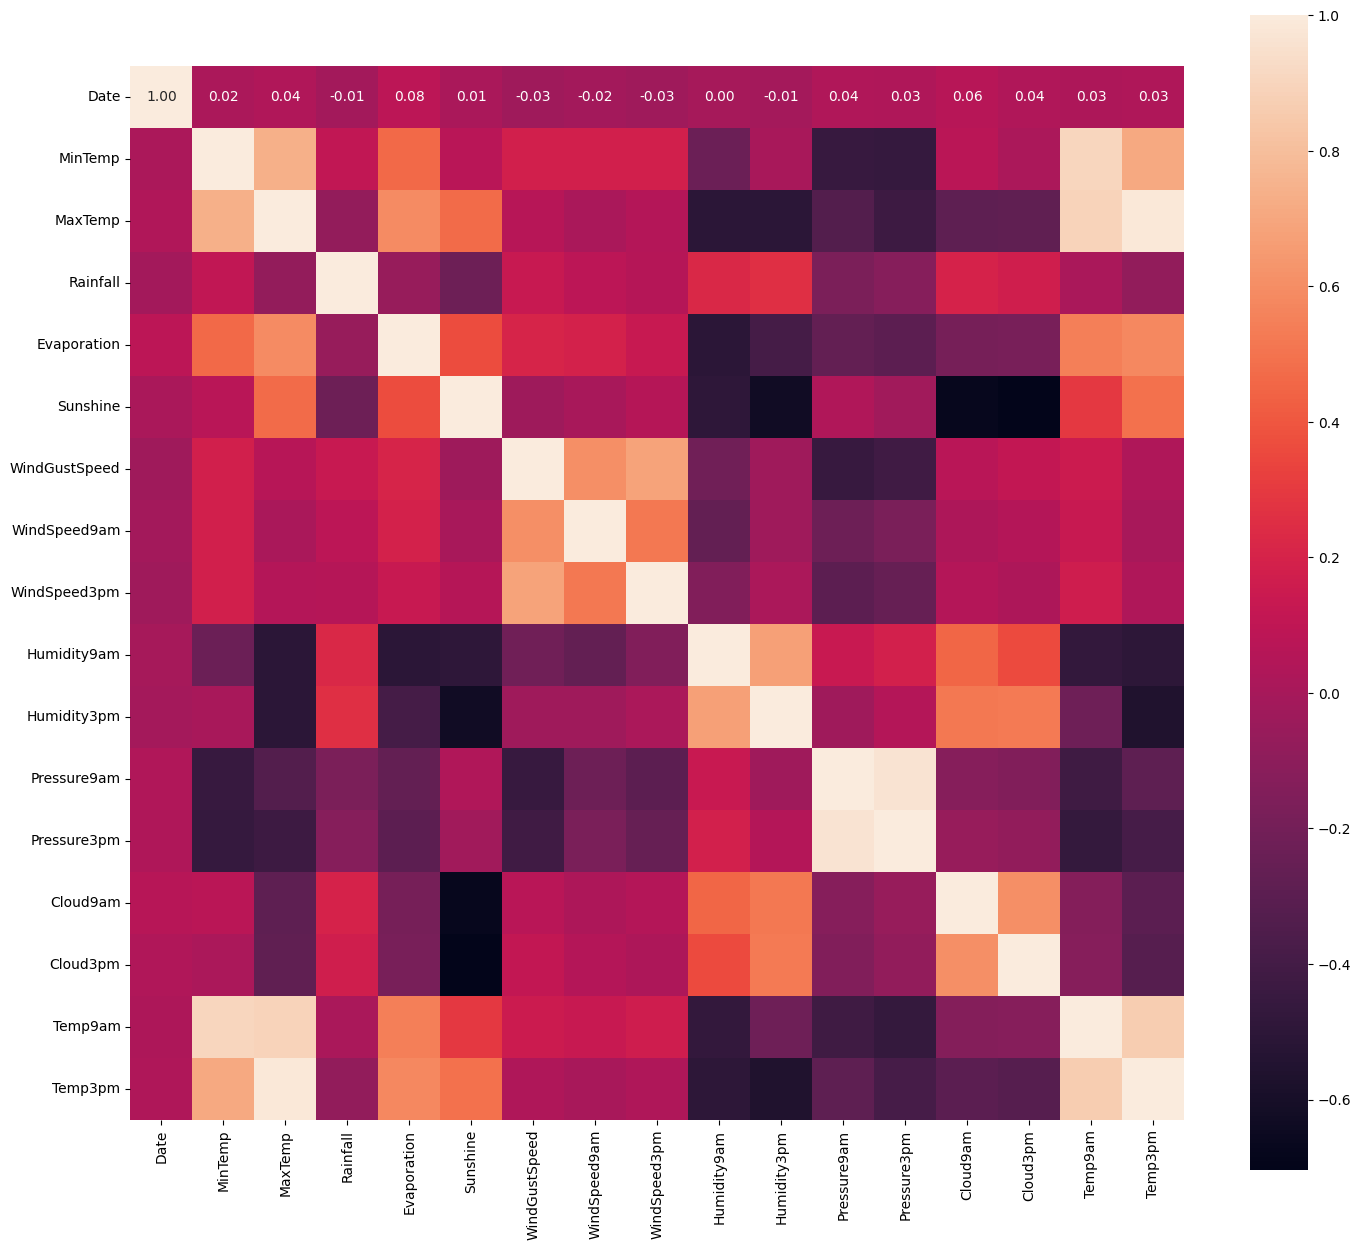

In [12]:
# Convert 'Date' column to datetime if not already done
rainaus['Date'] = pd.to_datetime(rainaus['Date'], format="%d-%m-%Y")

# Convert datetime to numeric (e.g., Unix timestamp)
rainaus['Date'] = rainaus['Date'].astype('int64') / 10**9

# Select only numeric columns
numeric_df = rainaus.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(17, 15))
ax = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [13]:
rainaus['RainTomorrow'] = rainaus['RainTomorrow'].map({'Yes': 1, 'No': 0})
rainaus['RainToday'] = rainaus['RainToday'].map({'Yes': 1, 'No': 0})

print(rainaus.RainToday)
print(rainaus.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: RainToday, Length: 142193, dtype: float64
0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64


In [14]:
#Checking percentage of missing data in every column

(rainaus.isnull().sum()/len(rainaus))*100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

In [15]:

#Filling the missing values for continuous variables with mean
rainaus['MinTemp']=rainaus['MinTemp'].fillna(rainaus['MinTemp'].mean())
rainaus['MaxTemp']=rainaus['MinTemp'].fillna(rainaus['MaxTemp'].mean())
rainaus['Rainfall']=rainaus['Rainfall'].fillna(rainaus['Rainfall'].mean())
rainaus['Evaporation']=rainaus['Evaporation'].fillna(rainaus['Evaporation'].mean())
rainaus['Sunshine']=rainaus['Sunshine'].fillna(rainaus['Sunshine'].mean())
rainaus['WindGustSpeed']=rainaus['WindGustSpeed'].fillna(rainaus['WindGustSpeed'].mean())
rainaus['WindSpeed9am']=rainaus['WindSpeed9am'].fillna(rainaus['WindSpeed9am'].mean())
rainaus['WindSpeed3pm']=rainaus['WindSpeed3pm'].fillna(rainaus['WindSpeed3pm'].mean())
rainaus['Humidity9am']=rainaus['Humidity9am'].fillna(rainaus['Humidity9am'].mean())
rainaus['Humidity3pm']=rainaus['Humidity3pm'].fillna(rainaus['Humidity3pm'].mean())
rainaus['Pressure9am']=rainaus['Pressure9am'].fillna(rainaus['Pressure9am'].mean())
rainaus['Pressure3pm']=rainaus['Pressure3pm'].fillna(rainaus['Pressure3pm'].mean())
rainaus['Cloud9am']=rainaus['Cloud9am'].fillna(rainaus['Cloud9am'].mean())
rainaus['Cloud3pm']=rainaus['Cloud3pm'].fillna(rainaus['Cloud3pm'].mean())
rainaus['Temp9am']=rainaus['Temp9am'].fillna(rainaus['Temp9am'].mean())
rainaus['Temp3pm']=rainaus['Temp3pm'].fillna(rainaus['Temp3pm'].mean())


In [16]:
#Filling the missing values for continuous variables with mode

rainaus['RainToday']=rainaus['RainToday'].fillna(rainaus['RainToday'].mode()[0])
rainaus['RainTomorrow']=rainaus['RainTomorrow'].fillna(rainaus['RainTomorrow'].mode()[0])

In [17]:
#Filling the missing values for continuous variables with mode
rainaus['WindDir9am'] = rainaus['WindDir9am'].fillna(rainaus['WindDir9am'].mode()[0])
rainaus['WindGustDir'] = rainaus['WindGustDir'].fillna(rainaus['WindGustDir'].mode()[0])
rainaus['WindDir3pm'] = rainaus['WindDir3pm'].fillna(rainaus['WindDir3pm'].mode()[0])

In [18]:
#Checking percentage of missing data in every column

(rainaus.isnull().sum()/len(rainaus))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

RainToday
0.0    110738
1.0     31455
Name: count, dtype: int64
RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

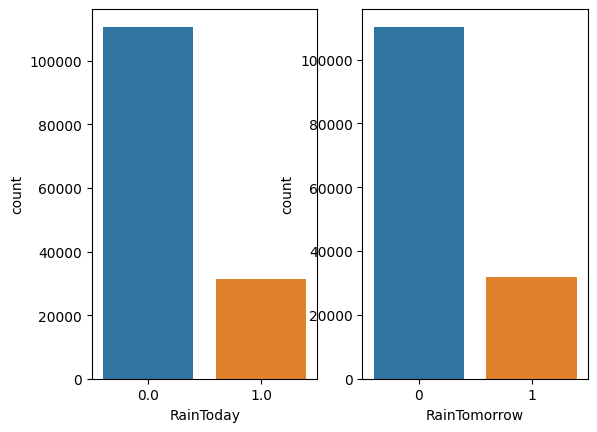

<Figure size 2000x2000 with 0 Axes>

In [19]:
#count of rain today and rain tomorrow
fig, ax =plt.subplots(1,2)
print(rainaus.RainToday.value_counts())
print(rainaus.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rainaus,x='RainToday',ax=ax[0])
sns.countplot(data=rainaus,x='RainTomorrow',ax=ax[1])

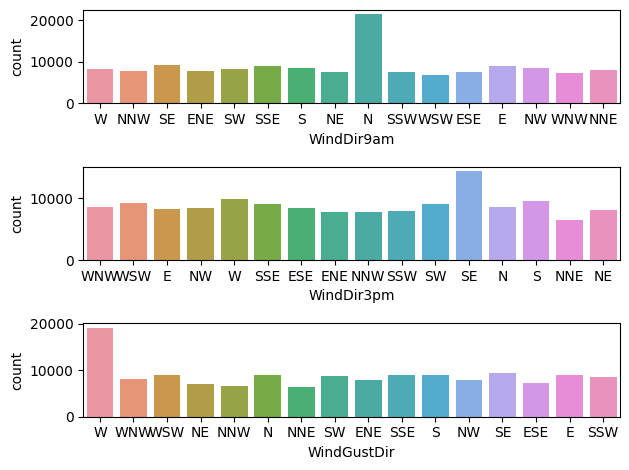

<Figure size 1000x1000 with 0 Axes>

In [20]:
# Direction of wind at 9 am, 3 pm.
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=rainaus,x='WindDir9am',ax=ax[0])  # north side.
sns.countplot(data=rainaus,x='WindDir3pm',ax=ax[1])  # south east.
sns.countplot(data=rainaus,x='WindGustDir',ax=ax[2])  #west side
fig.tight_layout()

In [21]:
#Dropping date column
rainaus=rainaus.iloc[:,1:]
rainaus

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,5.469824,7.624853,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0
1,Albury,7.4,7.4,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0
2,Albury,12.9,12.9,0.0,5.469824,7.624853,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0
3,Albury,9.2,9.2,0.0,5.469824,7.624853,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0
4,Albury,17.5,17.5,1.0,5.469824,7.624853,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,3.5,0.0,5.469824,7.624853,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0
142189,Uluru,2.8,2.8,0.0,5.469824,7.624853,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0
142190,Uluru,3.6,3.6,0.0,5.469824,7.624853,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0
142191,Uluru,5.4,5.4,0.0,5.469824,7.624853,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0


In [22]:
#Encoding the categorical variables
le = preprocessing.LabelEncoder()
rainaus['Location'] = le.fit_transform(rainaus['Location'])
rainaus['WindDir9am'] = le.fit_transform(rainaus['WindDir9am'])
rainaus['WindDir3pm'] = le.fit_transform(rainaus['WindDir3pm'])
rainaus['WindGustDir'] = le.fit_transform(rainaus['WindGustDir'])

In [23]:
rainaus.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.469824,7.624853,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0
1,2,7.4,7.4,0.0,5.469824,7.624853,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0
2,2,12.9,12.9,0.0,5.469824,7.624853,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0
3,2,9.2,9.2,0.0,5.469824,7.624853,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0
4,2,17.5,17.5,1.0,5.469824,7.624853,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0


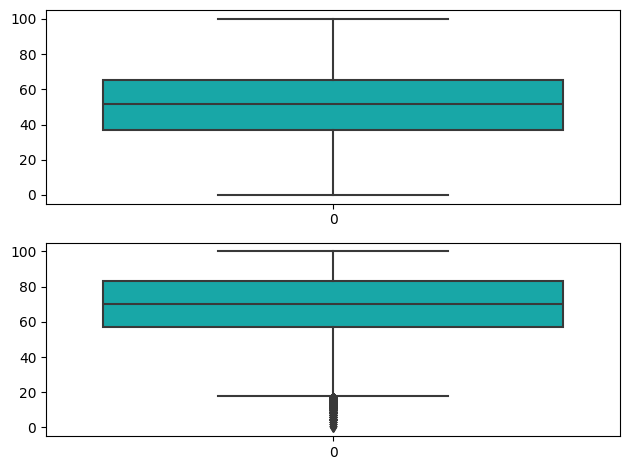

<Figure size 1000x1000 with 0 Axes>

In [24]:
#using box plots see for outliers
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rainaus['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rainaus['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

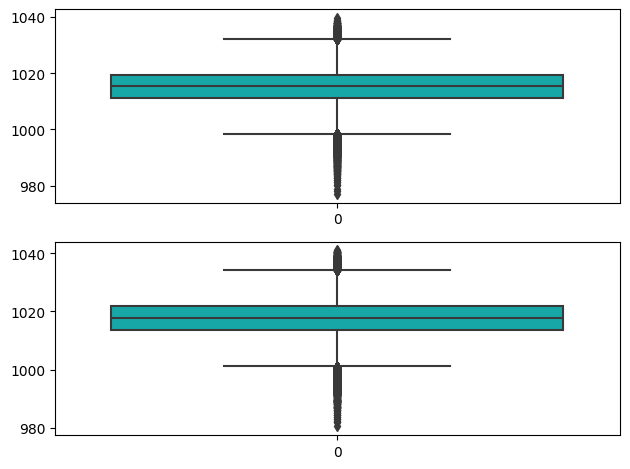

<Figure size 1000x1000 with 0 Axes>

In [25]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rainaus['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rainaus['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

In [26]:
# removing the outliers from the dataset
print('Shape of DataFrame Before Removing Outliers', rainaus.shape )
rainaus=rainaus[(np.abs(stats.zscore(rainaus)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rainaus.shape )

Shape of DataFrame Before Removing Outliers (142193, 22)
Shape of DataFrame After Removing Outliers (133634, 22)


In [27]:
print(rainaus.columns)


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [28]:
columns_to_drop = ['Temp3pm', 'Temp9am', 'Humidity9am']
columns_in_df = [col for col in columns_to_drop if col in rainaus.columns]
rainaus = rainaus.drop(columns=columns_in_df, axis=1)


In [29]:
#SLICING
x_train, x_test, y_train, y_test = train_test_split(rainaus.iloc[:,:-1], rainaus.iloc[:,-1], test_size=0.2, random_state=42)

In [30]:
# pip install --upgrade imbalanced-learn scikit-learn


In [31]:
#Balancing the data using SMOTE
os = SMOTE()
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count) #over sampling - add the additional rows

Counter({0: 84360, 1: 84360})


In [32]:
#Separating the target variable
    #decsion tree
    
X = rainaus.values[:, :-1] #traindataset
Y = rainaus.values[:, -1] # test 

scaler = StandardScaler()
X = scaler.fit_transform(X)

cols = rainaus.columns[:-1]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=100)

In [33]:
# Predicton on test with giniIndex
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 0. 0. ... 0. 0. 1.]


In [34]:
print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
      
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:
  [[29761  1837]
 [ 4825  3668]]
Accuracy :  83.38280412062558
Report :                precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     31598
         1.0       0.67      0.43      0.52      8493

    accuracy                           0.83     40091
   macro avg       0.76      0.69      0.71     40091
weighted avg       0.82      0.83      0.82     40091



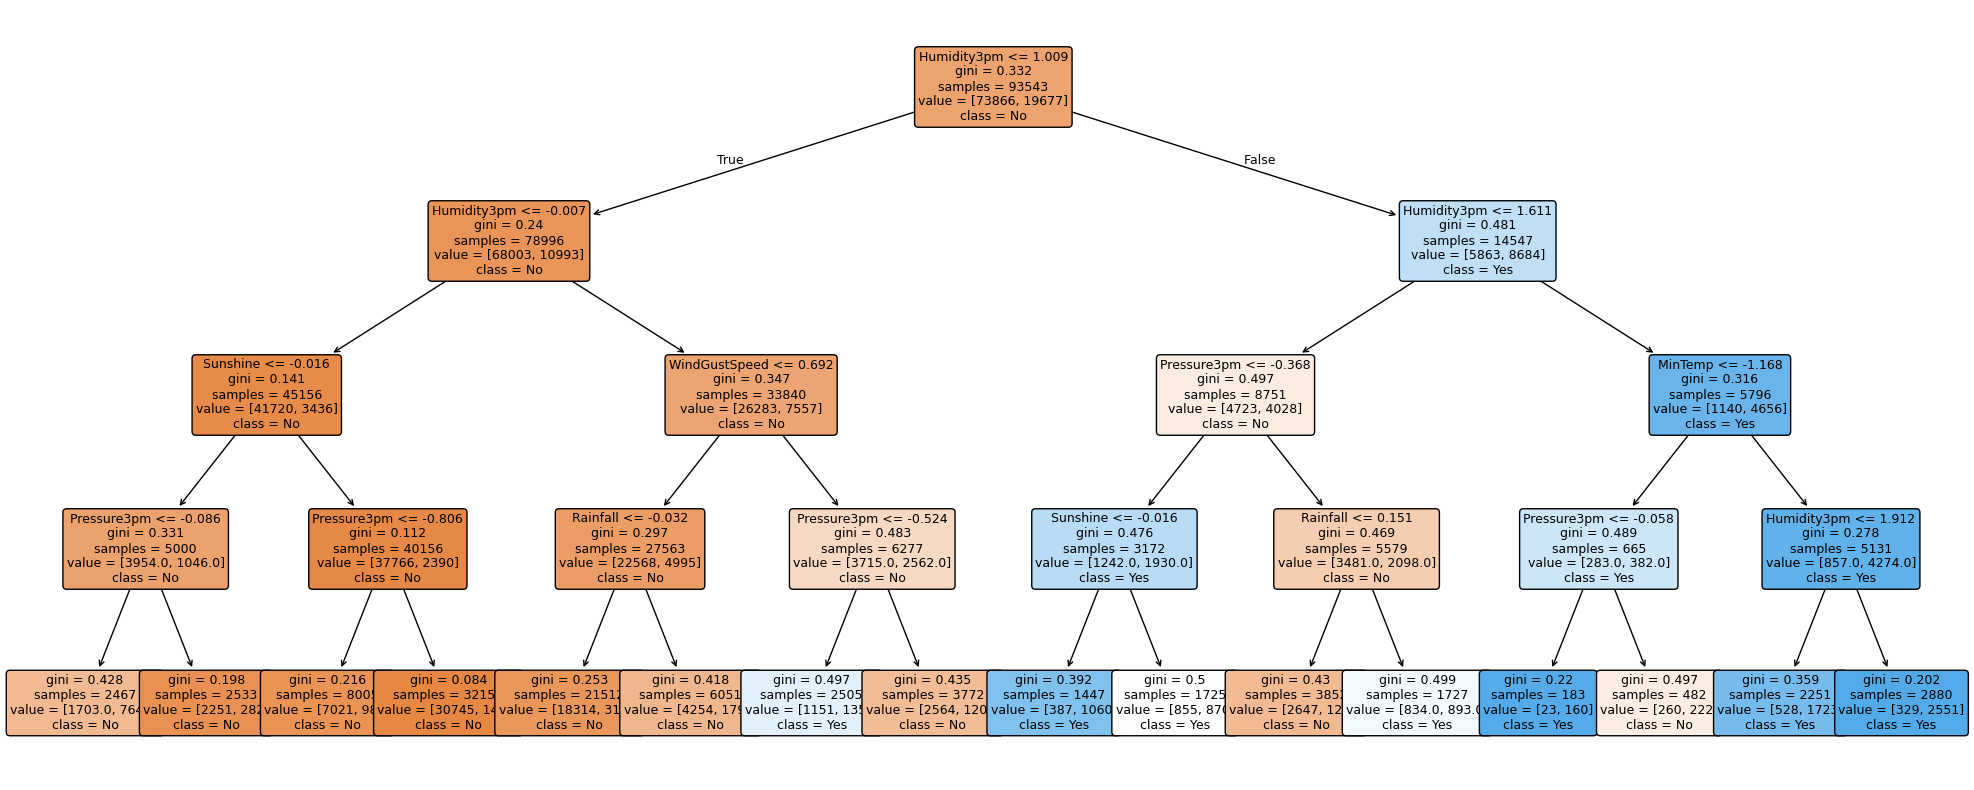

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming 'RainTomorrow' is the target variable with classes 'No' and 'Yes'
class_names = ['No', 'Yes']  # Replace with actual class names if different

plt.figure(figsize=(25,10))
tree.plot_tree(clf_gini, feature_names=cols, class_names=class_names, filled=True, rounded=True, fontsize=9)
plt.show()


In [36]:
#Separating the target variable
    #knn
X = rainaus.values[:, :-1]
Y =rainaus.values[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

knn = KNeighborsClassifier(n_neighbors=500, metric="euclidean")

In [37]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [38]:
print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
      
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:
  [[30965   633]
 [ 6215  2278]]
Accuracy :  82.91885959442268
Report :                precision    recall  f1-score   support

         0.0       0.83      0.98      0.90     31598
         1.0       0.78      0.27      0.40      8493

    accuracy                           0.83     40091
   macro avg       0.81      0.62      0.65     40091
weighted avg       0.82      0.83      0.79     40091



In [39]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_predicted_labels = GNB.predict(X_train)
y_pred  =  GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix")
print(cm)
print(classification_report(y_test,y_pred))

GNB_predicted_labels = GNB.predict(X_test)

print("Model Accuracy with Testing data: {0:.4f}".format(metrics.accuracy_score(y_test, GNB_predicted_labels)*100))
print()

confusion matrix
[[27340  4258]
 [ 3592  4901]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     31598
         1.0       0.54      0.58      0.56      8493

    accuracy                           0.80     40091
   macro avg       0.71      0.72      0.71     40091
weighted avg       0.81      0.80      0.81     40091

Model Accuracy with Testing data: 80.4195



In [40]:
rainaus.to_csv(r"C:\Users\kottu\Downloads\weather.csv", index = False)
rainaus.head(20)



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.600000,5.469824,7.624853,13,44.0,13,14,20.000000,24.0,22.0,1007.7,1007.1,8.000000,4.503167,0.0,0
1,2,7.4,7.4,0.000000,5.469824,7.624853,14,44.0,6,15,4.000000,22.0,25.0,1010.6,1007.8,4.437189,4.503167,0.0,0
2,2,12.9,12.9,0.000000,5.469824,7.624853,15,46.0,13,15,19.000000,26.0,30.0,1007.6,1008.7,4.437189,2.000000,0.0,0
3,2,9.2,9.2,0.000000,5.469824,7.624853,4,24.0,9,0,11.000000,9.0,16.0,1017.6,1012.8,4.437189,4.503167,0.0,0
4,2,17.5,17.5,1.000000,5.469824,7.624853,13,41.0,1,7,7.000000,20.0,33.0,1010.8,1006.0,7.000000,8.000000,0.0,0
5,2,14.6,14.6,0.200000,5.469824,7.624853,14,56.0,13,13,19.000000,24.0,23.0,1009.2,1005.4,4.437189,4.503167,0.0,0
6,2,14.3,14.3,0.000000,5.469824,7.624853,13,50.0,12,13,20.000000,24.0,19.0,1009.6,1008.2,1.000000,4.503167,0.0,0
7,2,7.7,7.7,0.000000,5.469824,7.624853,13,35.0,10,13,6.000000,17.0,19.0,1013.4,1010.1,4.437189,4.503167,0.0,0
9,2,13.1,13.1,1.400000,5.469824,7.624853,13,28.0,8,10,15.000000,11.0,27.0,1007.0,1005.7,4.437189,4.503167,1.0,0
10,2,13.4,13.4,0.000000,5.469824,7.624853,3,30.0,10,2,17.000000,6.0,22.0,1011.8,1008.7,4.437189,4.503167,0.0,1


In [41]:

 rainaus.shape

(133634, 19)